In [3]:
import os
print(os.listdir("./data"))

['boston_raw.txt']


✅ Cleaned data saved to data/boston_cleaned.csv
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.4

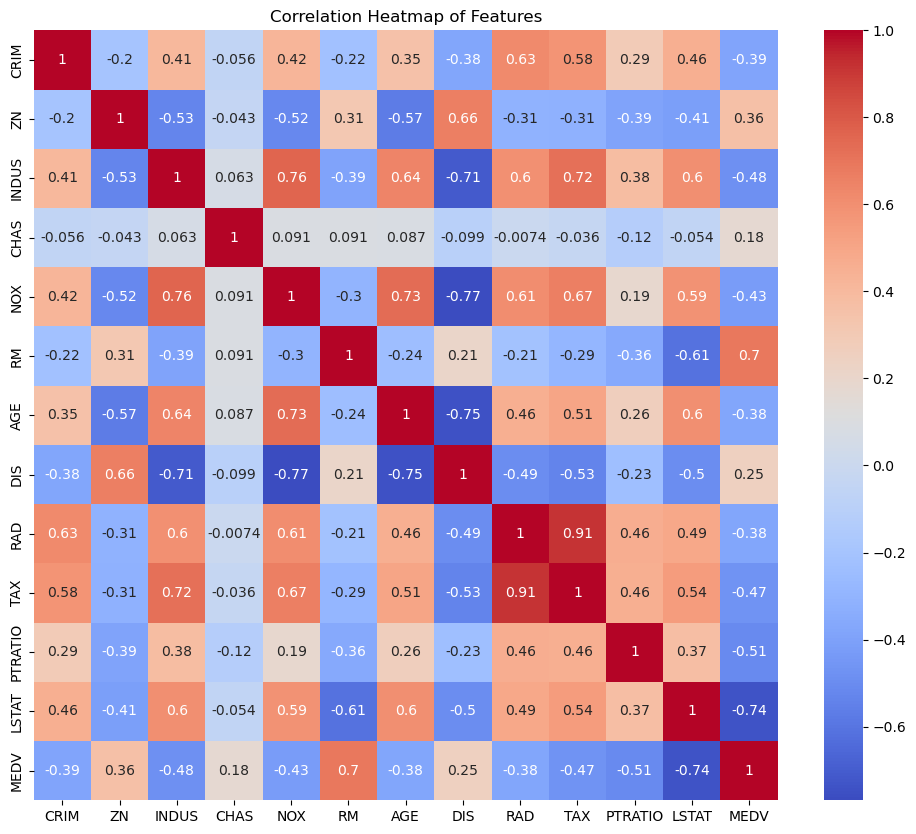

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the correct data folder exists
data_path = "./data/boston_raw.txt"

# Check if the file exists before proceeding
if not os.path.exists(data_path):
    raise FileNotFoundError(f"Error: The file {data_path} does not exist. Run Notebook 1 first.")

# Load Raw Data
with open(data_path, "r") as f:
    tableData = f.read().splitlines()

# Convert to structured dataset
df = pd.DataFrame({
    'CRIM': tableData[0::14],
    'ZN': tableData[1::14],
    'INDUS': tableData[2::14],
    'CHAS': tableData[3::14],
    'NOX': tableData[4::14],
    'RM': tableData[5::14],
    'AGE': tableData[6::14],
    'DIS': tableData[7::14],
    'RAD': tableData[8::14],
    'TAX': tableData[9::14],
    'PTRATIO': tableData[10::14],
    'B': tableData[11::14],
    'LSTAT': tableData[12::14],
    'MEDV': tableData[13::14]
})

# Convert data types
df = df.astype(float)
df['RAD'] = df['RAD'].astype(int)
df['CHAS'] = df['CHAS'].astype(int)

# Remove 'B' column
df.drop(columns=['B'], inplace=True)

# Save cleaned dataset
df.to_csv("./data/boston_cleaned.csv", index=False)
print("✅ Cleaned data saved to data/boston_cleaned.csv")

# Summary statistics
print(df.describe())

# Visualization - Heatmap of Correlation
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()